In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sets import Set
import random as rd


def generateGraph(graph_pts, graph_dict):
    ''' Function to construct the graph using graph points and dictionary.
    We make use of NetworkX Graph library for python 2.
    '''

    G = nx.Graph()

    for a, b, wt in graph_pts:
        G.add_edge(graph_dict[a], graph_dict[b], weight=int(wt))
        
    return G


graph_pts = np.genfromtxt('output.txt', dtype=None)


### Now, create a list of all edges that will be in the graph
new_graph_edges = []

for i in np.arange(0, graph_pts.shape[0]):
    
    temp_str = graph_pts[i][1]
    s1, s2, s3 = temp_str.rpartition('.')
    
    # Any '*' import is not considered since it is a generic import
    if s3 == "*":
    	continue

    j1, j2, j3 = s1.partition('.')
    t1, t2, t3 = graph_pts[i][0].rpartition('.')
    
    # Any imports of kind 'java.something something' are not considered
    if j1 != "java" :
        new_graph_edges.append([t1, s3, int(1)])



final_graph_edges = np.asarray(new_graph_edges)
    
np.savetxt('new_graph_edges.txt', final_graph_edges, delimiter='\t', fmt="%s")


### Make a dictionary for all classes, so that it is easier to access

set_temp = Set()

for i,j,wt in final_graph_edges:
    set_temp.add(i)
    set_temp.add(j)

print("Number of graph edges : {}".format(final_graph_edges.shape[0]))
print("Number of distinct classes : {}".format(len(set_temp)))

graph_pts_dict = {}
reverse_graph_pts_dict = {}
temp_class_list = []
for num, class_name in enumerate(set_temp):
    graph_pts_dict[class_name] = num
    reverse_graph_pts_dict[num] = class_name
    temp_class_list.append([num, class_name])

class_list = np.asarray(temp_class_list)
np.savetxt('class_list.txt', class_list, delimiter='\t', fmt="%s")


### Now, construct the actual graph

G = generateGraph(final_graph_edges, graph_pts_dict)

print("Number of graph nodes : {}".format(len(G.nodes())))


### Find coupling metric value (CBO - Coupling Between Objects)for each class
node_weight = []

for node in G.nodes():
	node_weight.append([node, reverse_graph_pts_dict[node], len(G[node])])

node_weight_dtype = [('node1', int), ('node2', str), ('edge_count', int)]
node_weight = sorted(node_weight, key=lambda a_entry: a_entry[1])
node_weight_np = np.asarray(node_weight)
np.savetxt('class_weight.txt', node_weight, delimiter='\t', fmt="%s")


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: the sets module is deprecated
  """


Number of graph edges : 51229
Number of distinct classes : 6441
Number of graph nodes : 6441


In [40]:
### Distrubution graph of number of nodes vs CBO value

CBO_Vals, counts = np.unique(ar=node_weight_np[:,2].astype(int), return_counts=True)
#node_weight = sorted(node_weight, key=lambda a_entry: a_entry[2])
#zip(CBO_Vals, counts)

CBO_mtx = zip(CBO_Vals, counts)

plt.figure(1)
plt.plot(CBO_Vals, counts)
plt.xlabel('CBO score')
plt.ylabel('No. of classes')
plt.title('Distribution curve of CBO score')
plt.savefig('dist.png')
#plt.show()

In [72]:
### Now, calculate and store History score of all classes
f = open('HistoryScore.txt')

history_pts = []

for line in f:
    #print line
    p1, p2, p3 = line.partition('--------')
    if p3 == '':
        continue
    history_pts.append([p1, int(p3)])

history_pts_np = np.asarray(history_pts)

print("Number of distinct classes with a history : {}".format(history_pts_np.shape[0]))
#print(history_pts_np)

history_edges = []
history_dict = {}
for i in np.arange(0, history_pts_np.shape[0]):
    s1, s2, s3 = history_pts[i][0].rpartition('/')
    t1, t2, t3 = s3.rpartition('.')
    temp_val = history_pts_np[i][1]
    history_dict[t1] = float(temp_val)

    
max_val = max(history_dict.values())
min_val = min(history_dict.values())

for i in history_dict:
    history_dict[i] = float((history_dict[i] - min_val)/(max_val-min_val)*100)
    
for node_no, class_name, class_CBO in node_weight_np:
    if class_name in history_dict.keys():
        history_edges.append([class_name, history_dict[class_name]])
    else:
        history_edges.append([class_name, 0])

history_edges_np = np.array(history_edges)
history_edges_np.reshape(len(history_edges), 2)
np.savetxt('history_list.txt', history_edges_np, delimiter='\t', fmt="%s")

print("Number of classes in CBO List : {}".format(node_weight_np.shape[0]))
print("Number of classes in History List : {}".format(history_edges_np.shape[0]))

print(max(history_dict.values()))
print(max(history_dict, key=history_dict.get))


Number of distinct classes with a history : 6298
Number of classes in CBO List : 6441
Number of classes in History List : 6441
100.0
WorkbenchMessages


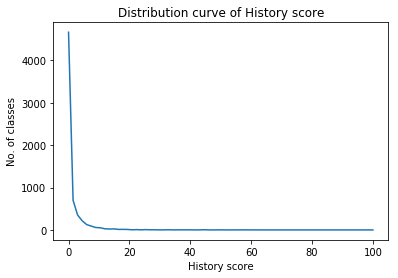

In [70]:
### Distrubution graph of number of nodes vs History value

History_Vals, counts = np.unique(ar=history_edges_np[:,1].astype(float), return_counts=True)

History_mtx = zip(History_Vals, counts)

plt.figure(2)
plt.plot(History_Vals, counts)
plt.xlabel('History score')
plt.ylabel('No. of classes')
plt.title('Distribution curve of History score')
plt.savefig('dist_history.png')
plt.show()